In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


## przejechana odległość

[Wzór haversine](https://en.wikipedia.org/wiki/Haversine_formula) wyznacza odległość na kuli pomiędzy dwiema parami współrzędnych GPS.  

Szerokość geograficzną oznaczymy przez $\varphi$ (phi), a długość przez $\lambda$ (lambda).

Wzór przyjmuje postać:

$$
d = 2r \arcsin \left( 
    \sqrt{ 
        \sin^2\!\left(\frac{\varphi_2 - \varphi_1}{2}\right) 
        + \cos(\varphi_1)\cos(\varphi_2)\sin^2\!\left(\frac{\lambda_2 - \lambda_1}{2}\right) 
    } 
\right)
$$

przy czym:

$$
\begin{aligned}
r & : \text{ promień kuli (średni promień Ziemi to 6371 km)} \\
\varphi_1, \varphi_2 & : \text{ szerokości geograficzne punktów 1 i 2} \\
\lambda_1, \lambda_2 & : \text{ długości geograficzne punktów 1 i 2} \\
\end{aligned}
$$


In [4]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [9]:
def haversine_distance(df, lat_p="pickup_latitude", long_p = "pickup_longitude", lat_d="dropoff_latitude", long_d="dropoff_longitude"):
    r = 6371
    phi1 = np.radians(df[lat_p])
    phi2 = np.radians(df[lat_d])

    delta_phi  = phi2 - phi1
    delta_lambda = np.radians(df[long_d] - df[long_p])

    a = np.sin(delta_phi/2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    d = 2 * r * np.arcsin(np.sqrt(a))

    return d
     

In [11]:
df["dist_km"] = haversine_distance(df)

In [12]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [17]:
df["EDTdate"] = pd.to_datetime(df.pickup_datetime).dt.tz_convert("US/Eastern")

In [23]:
df["AMorPM"] = np.where(df.EDTdate.dt.hour < 12, "am", "pm")

In [24]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,AMorPM
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56-04:00,am
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53-04:00,am
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26-04:00,am
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03-04:00,pm
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01-04:00,pm


<Axes: >

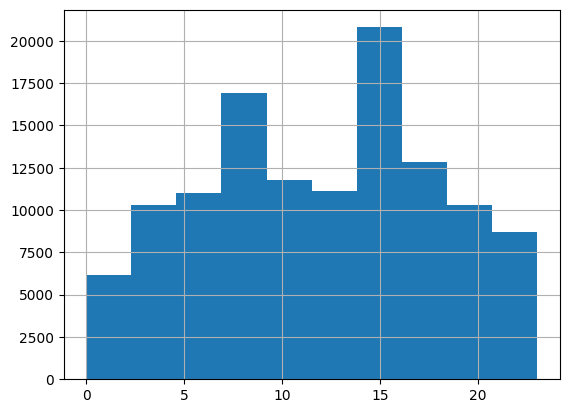

In [28]:
df.EDTdate.dt.hour.hist()

In [29]:
df["Hour"] = df.EDTdate.dt.hour

In [32]:
df["Weekday"] = df.EDTdate.dt.strftime("%a")


In [34]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'AMorPM', 'Hour', 'Weekday'],
      dtype='object')

In [33]:
# dzielimy na zmienne kategoryczne i ciagle

In [69]:
cat_cols = ["Hour", "AMorPM", "Weekday"]
dropoff_cols = ["pickup_datetime", "EDTdate", "fare_class"]
y = ["fare_amount"]
cont_cols = list(df.columns)
cont_cols = [col for col in cont_cols if col not in cat_cols + dropoff_cols + y]
cont_cols

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'dist_km']

In [70]:
df.dtypes

pickup_datetime                          object
fare_amount                             float64
fare_class                                int64
pickup_longitude                        float64
pickup_latitude                         float64
dropoff_longitude                       float64
dropoff_latitude                        float64
passenger_count                           int64
dist_km                                 float64
EDTdate              datetime64[ns, US/Eastern]
AMorPM                                 category
Hour                                   category
Weekday                                category
dtype: object

In [71]:
for cat in cat_cols:
    df[cat] = df[cat].astype("category")

In [72]:
df.dtypes

pickup_datetime                          object
fare_amount                             float64
fare_class                                int64
pickup_longitude                        float64
pickup_latitude                         float64
dropoff_longitude                       float64
dropoff_latitude                        float64
passenger_count                           int64
dist_km                                 float64
EDTdate              datetime64[ns, US/Eastern]
AMorPM                                 category
Hour                                   category
Weekday                                category
dtype: object

In [73]:
df.Hour.cat.codes

0          4
1         11
2          7
3         17
4         22
          ..
119995    10
119996     6
119997    14
119998     4
119999    12
Length: 120000, dtype: int8

In [74]:
hr = df["Hour"].cat.codes.values

In [75]:
ampm = df["AMorPM"].cat.codes.values
wkdy = df["Weekday"].cat.codes.values

In [76]:
cats = np.stack([hr, ampm, wkdy], 1)

In [77]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [78]:
cats = torch.tensor(cats, dtype=torch.int64)

In [79]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [80]:
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [81]:
y = torch.tensor(df["fare_amount"].values, dtype=torch.float).reshape(-1, 1)
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [82]:
cats.shape

torch.Size([120000, 3])

In [83]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [84]:
conts.shape

torch.Size([120000, 6])

day_of_week  -> wartosci od 0 - 6 

one hot encoding

    0 - [1, 0, 0 , 0, 0, 0, 0]
    1 - [0, 1, 0 , 0, 0, 0, 0]
    ...
    
    
    0 - [0.1, 0.8, -0.3]
    1 - [-0.5, 0.2, 0.7]

In [85]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [86]:
cat_szs

[24, 2, 7]

In [87]:
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]

In [88]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [143]:
## definicja modelu

class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers: list[int], p=0.5):
        super().__init__()
        
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])

        self.emb_drop = nn.Dropout(p)

        self.bn_cont = nn.BatchNorm1d(n_cont)

        # budowa sieci gestej

        layerlist = []
        n_emb = sum((nf for _, nf in emb_szs)) # calkowita dl wektora embedingow
        n_in = n_emb + n_cont # wejscie = emb + cechy ciagle


        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i

        layerlist.append(nn.Linear(layers[-1], out_sz)) # warstwa wyjsciowa
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):

        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))

        x = torch.cat(embeddings, 1) # sklejenie w 1 tensor

        x = self.emb_drop(x) # dropout na embeddingach

        x_cont = self.bn_cont(x_cont)

        x = torch.cat([x, x_cont], 1) # zlaczenie emb i ciaglych

        x = self.layers(x)
        return x

        

In [144]:
# nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])

In [145]:
model = TabularModel(
    emb_szs=emb_szs,
    n_cont=6,
    out_sz=1,
    layers = [200, 100],
    p=0.4
)
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [146]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [147]:
batch_size = 60000
test_size = int(batch_size * .2)

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]

con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]


In [148]:


epochs = 500
losess = []

for i in range(1, epochs+1):
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losess.append(loss)

    if i % 10 == 1:
        print(f"Epoch {i:3} loss: {loss.item():10.8f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch   1 loss: 12.56959438
Epoch  11 loss: 11.55039692
Epoch  21 loss: 10.95462608
Epoch  31 loss: 10.61840725
Epoch  41 loss: 10.38895512
Epoch  51 loss: 10.24860382
Epoch  61 loss: 10.09641171
Epoch  71 loss: 9.94221878
Epoch  81 loss: 9.77332211
Epoch  91 loss: 9.58525085
Epoch 101 loss: 9.36449528
Epoch 111 loss: 9.11124706
Epoch 121 loss: 8.81290436
Epoch 131 loss: 8.45868874
Epoch 141 loss: 8.07119751
Epoch 151 loss: 7.62991858
Epoch 161 loss: 7.16703796
Epoch 171 loss: 6.66054916
Epoch 181 loss: 6.13785744
Epoch 191 loss: 5.61483955
Epoch 201 loss: 5.14647627
Epoch 211 loss: 4.72422552
Epoch 221 loss: 4.36410427
Epoch 231 loss: 4.09049511
Epoch 241 loss: 3.93832850
Epoch 251 loss: 3.83396316
Epoch 261 loss: 3.78418493
Epoch 271 loss: 3.76906872
Epoch 281 loss: 3.69853806
Epoch 291 loss: 3.70989728
Epoch 301 loss: 3.65966606
Epoch 311 loss: 3.64299941
Epoch 321 loss: 3.61750913
Epoch 331 loss: 3.58539224
Epoch 341 loss: 3.58205366
Epoch 351 loss: 3.59769726
Epoch 361 loss: 3.534

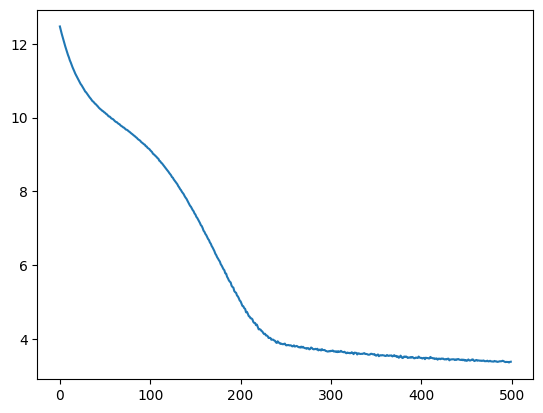

In [132]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in losess])

In [133]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print("MSE", loss)

MSE tensor(10.9498)


In [134]:
def build_dataframe(
    plat: float, plong: float,
    dlat: float, dlong: float,
    psngr: int, dt: str
) -> pd.DataFrame:
    """Buduje bazowy DataFrame z pojedynczym rekordem."""
    return pd.DataFrame({
        'pickup_latitude': plat,
        'pickup_longitude': plong,
        'dropoff_latitude': dlat,
        'dropoff_longitude': dlong,
        'passenger_count': psngr,
        'EDTdate': pd.to_datetime(dt)
    }, index=[0])


def add_distance_feature(df: pd.DataFrame) -> pd.DataFrame:
    """Dodaje kolumnę z odległością (w km)."""
    df['dist_km'] = haversine_distance(
        df, 'pickup_latitude', 'pickup_longitude',
        'dropoff_latitude', 'dropoff_longitude'
    )
    return df


def add_datetime_features(df: pd.DataFrame) -> pd.DataFrame:
    """Dodaje cechy związane z czasem (Hour, AMorPM, Weekday)."""
    df['Hour'] = df['EDTdate'].dt.hour
    df['AMorPM'] = np.where(df['Hour'] < 12, 0, 1)
    df['Weekday'] = (
        df['EDTdate']
        .dt.strftime("%a")
        .replace(
            ['Fri','Mon','Sat','Sun','Thu','Tue','Wed'],
            [0,1,2,3,4,5,6]
        )
        .astype('int64')
    )
    return df


def dataframe_to_tensors(df: pd.DataFrame) -> tuple[torch.Tensor, torch.Tensor]:
    """Konwertuje DataFrame do tensorów kategorii i wartości ciągłych."""
    cat_cols = ['Hour', 'AMorPM', 'Weekday']
    cont_cols = [
        'pickup_latitude', 'pickup_longitude',
        'dropoff_latitude', 'dropoff_longitude',
        'passenger_count', 'dist_km'
    ]

    xcats = torch.tensor(
        np.stack([df[col].values for col in cat_cols], 1),
        dtype=torch.int64
    )
    xconts = torch.tensor(
        np.stack([df[col].values for col in cont_cols], 1),
        dtype=torch.float
    )
    return xcats, xconts


def prepare_features(
    plat: float, plong: float,
    dlat: float, dlong: float,
    psngr: int, dt: str
) -> tuple[torch.Tensor, torch.Tensor]:
    """
    Przygotowuje cechy wejściowe (kategoryczne i ciągłe) 
    na podstawie podanych parametrów.
    """
    df = build_dataframe(plat, plong, dlat, dlong, psngr, dt)
    df = add_distance_feature(df)
    df = add_datetime_features(df)
    return dataframe_to_tensors(df)


def predict_fare(
    model,
    plat: float, plong: float,
    dlat: float, dlong: float,
    psngr: int, dt: str
) -> float:
    """
    Zwraca przewidywaną opłatę za kurs taksówką na podstawie modelu i parametrów wejściowych.
    """
    model.eval()
    xcats, xconts = prepare_features(plat, plong, dlat, dlong, psngr, dt)

    with torch.no_grad():
        prediction = model(xcats, xconts)

    return prediction.item()

In [140]:
fare = predict_fare(
    model,
    plat=40.5,
    plong=-74.2,
    dlat=40.1,
    dlong=-73,
    psngr=3,
    dt="2010-04-12 08:24:00"
)
print(f"The predicted fare amount is ${fare:.2f}")

The predicted fare amount is $5899.50


/var/folders/pd/gsgbf0fd4tv7ntlsxt53r0sh0000gn/T/ipykernel_66379/2349000059.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(


In [142]:
fare = predict_fare(
    model,
    plat=40.5,
    plong=-74.2,
    dlat=40.5,
    dlong=-74.2,
    psngr=1,
    dt="2010-04-12 08:24:00"
)
print(f"The predicted fare amount is ${fare:.2f}")

The predicted fare amount is $5886.14


/var/folders/pd/gsgbf0fd4tv7ntlsxt53r0sh0000gn/T/ipykernel_66379/2349000059.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(


In [ ]:
def predict_fare_keras(model, plat, plong, dlat, dlong, psngr, dt):
    xcats, xconts = prepare_features(plat, plong, dlat, dlong, psngr, dt)
    keras_inputs = {f'cat_{i}': xcats.numpy()[:, i:i+1].astype('int32') for i in range(xcats.shape[1])}
    keras_inputs['cont'] = xconts.numpy().astype('float32')
    prediction = model.predict(keras_inputs, verbose=0)
    return float(prediction.squeeze())

In [149]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Ustawiamy ziarno losowe (seed), żeby wyniki były powtarzalne
tf.random.set_seed(42)
np.random.seed(42)

# Konwersja danych wejściowych z tensora PyTorch/TF na numpy arrays 
# i rzutowanie na odpowiednie typy (int32 dla kategorii, float32 dla liczb zmiennoprzecinkowych).
# Dzięki temu model w Kerasie dostaje dane w formacie, którego oczekuje.
cat_train_np = cat_train.numpy().astype('int32')
cat_test_np = cat_test.numpy().astype('int32')
con_train_np = con_train.numpy().astype('float32')
con_test_np = con_test.numpy().astype('float32')
y_train_np = y_train.numpy().astype('float32')
y_test_np = y_test.numpy().astype('float32')

# Przygotowanie słownika wejść dla modelu:
# - każdy atrybut kategoryczny dostaje osobny "wektor kolumnowy"
# - dane ciągłe grupujemy razem w jednej macierzy pod kluczem 'cont'
train_inputs = {f'cat_{i}': cat_train_np[:, i:i+1] for i in range(cat_train_np.shape[1])}
test_inputs = {f'cat_{i}': cat_test_np[:, i:i+1] for i in range(cat_test_np.shape[1])}
train_inputs['cont'] = con_train_np
test_inputs['cont'] = con_test_np

# Informacyjnie wypisujemy wersję TensorFlow (pomocne przy debugowaniu i odtwarzaniu wyników)

inputs_cat = []     # lista wejść dla zmiennych kategorycznych
embeddings = []     # lista embeddingów odpowiadających tym wejściom

# Tworzymy osobne wejście i warstwę embedding dla każdej cechy kategorycznej
for idx, (cardinality, emb_dim) in enumerate(emb_szs):
    # Wejście (pojedyncza liczba całkowita reprezentująca kategorię)
    input_layer = keras.Input(shape=(1,), name=f'cat_{idx}')
    
    # Warstwa embedding: zamiana indeksu kategorii na gęsty wektor o wymiarze emb_dim
    embed = keras.layers.Embedding(cardinality, emb_dim, name=f'emb_{idx}')(input_layer)
    
    # Reshape: spłaszczenie (bo Embedding zwraca kształt (batch, 1, emb_dim))
    embed = keras.layers.Reshape((emb_dim,), name=f'emb_{idx}_reshape')(embed)
    
    # Zbieramy do list
    embeddings.append(embed)
    inputs_cat.append(input_layer)

embeddings, inputs_cat


2025-11-23 15:52:38.004752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


([<KerasTensor shape=(None, 12), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>,
  <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_3>,
  <KerasTensor shape=(None, 4), dtype=float32, sparse=False, ragged=False, name=keras_tensor_5>],
 [<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=cat_0>,
  <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=cat_1>,
  <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=cat_2>])